<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install yfinance
!pip install missingno
!pip install git+https://github.com/quantopian/pyfolio
!pip install pyportfolioopt

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-b76wwvyr
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-b76wwvyr


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as no
import yfinance as yf
import pyfolio as pf

In [40]:
url='https://en.wikipedia.org/wiki/NIFTY_50'
df= pd.read_html(url)

In [41]:
stocks= list(df[1].Symbol)
stocks

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BHARTIARTL',
 'BPCL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'IOC',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBIN',
 'SBILIFE',
 'SHREECEM',
 'SUNPHARMA',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

In [268]:
str(stocks)

"['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SBILIFE', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TATACONSUM', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'WIPRO']"

In [43]:
tickets=[i +'.NS' for i in stocks]

In [44]:
tickets.append('^NSEI')
tickets

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BHARTIARTL.NS',
 'BPCL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFC.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'IOC.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'WIPRO.NS',
 '^NSEI']

In [45]:
portfolio= yf.download(tickers=tickets,rounding=True,period='2y')['Adj Close'].dropna()
portfolio.head()

[*********************100%***********************]  51 of 51 completed


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-18,359.14,1717.33,722.95,2920.24,9096.94,4138.68,407.76,431.55,2979.76,456.89,163.18,1716.06,2694.65,2117.73,762.89,546.61,2167.69,1256.61,568.77,2400.06,191.29,1993.72,496.90,1367.66,675.00,108.05,226.66,239.73,1626.39,1294.02,564.89,6990.60,13610.95,101.09,116.35,126.76,1435.47,997.22,322.13,19737.49,415.96,301.32,170.10,390.94,2089.28,696.17,1147.32,4093.41,535.89,247.89,11884.5
2019-11-19,357.57,1699.90,747.80,2924.08,9145.45,4119.61,437.81,429.23,2960.26,468.29,162.61,1712.85,2700.56,2144.34,779.40,543.52,2144.23,1266.42,569.02,2367.51,190.05,1975.83,492.06,1385.92,682.33,108.41,225.35,238.10,1622.99,1295.21,552.04,6938.40,13641.43,101.00,115.79,129.96,1485.20,933.90,327.38,19874.08,417.29,298.56,167.75,383.03,2046.77,706.68,1151.68,4067.42,538.09,248.83,11940.1
2019-11-20,360.17,1702.02,748.75,2925.32,9071.96,4122.40,435.76,450.44,2956.42,478.71,165.42,1743.39,2794.73,2118.95,782.87,542.64,2133.42,1267.86,573.01,2368.99,188.47,1964.92,493.55,1462.09,682.47,106.70,226.62,238.87,1598.66,1309.48,551.84,7044.07,13749.23,100.75,116.18,130.39,1522.48,937.04,325.79,20155.35,440.90,302.80,167.40,380.12,2046.53,714.32,1151.33,4081.20,539.65,247.34,11999.1
2019-11-21,365.47,1698.91,737.40,2949.33,9047.83,4107.56,424.80,425.22,2915.01,481.59,160.16,1727.03,2834.70,2164.78,772.26,544.46,2142.53,1277.82,587.52,2343.05,186.35,1986.40,496.80,1439.05,682.71,105.07,222.10,235.55,1594.46,1320.77,543.33,6912.40,13701.68,99.24,113.96,130.52,1512.60,926.97,328.32,20160.07,438.11,297.87,164.15,367.15,2055.80,708.53,1136.87,4044.70,531.79,246.00,11968.4
2019-11-22,364.83,1661.78,732.10,2916.03,9032.04,4062.38,419.17,421.33,2867.57,474.99,162.12,1713.49,2826.82,2243.52,786.39,533.99,2168.66,1259.30,584.67,2341.28,187.98,1966.72,495.35,1439.05,663.52,105.80,223.86,241.32,1568.32,1307.44,537.62,6953.17,13694.00,101.39,116.31,132.15,1521.35,939.98,326.29,20163.05,442.96,295.70,162.35,381.36,2010.76,698.39,1124.35,4048.57,520.76,241.58,11914.4


In [267]:
# sns.pairplot(pd.DataFrame(portfolio.pct_change().dropna()))

In [266]:
a=portfolio.describe().round(3)
a.iloc[1:2,]
a.loc[['min','mean','max'],:]

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
min,206.350,1485.720,303.150,1870.850,4096.260,1826.050,397.700,229.310,2028.170,372.64,98.180,1712.850,2583.350,1260.160,396.670,390.080,1453.540,764.390,341.290,1531.930,86.85,1782.440,283.170,299.820,503.910,61.190,133.100,135.140,1097.700,680.740,264.870,3950.550,12557.010,65.760,52.140,99.370,869.680,537.670,149.470,15750.080,320.230,223.550,65.300,241.93,1603.450,457.290,793.010,2994.000,248.520,161.990,7610.250
mean,502.158,2291.789,626.361,3224.332,9588.715,4668.615,538.427,372.414,3394.896,734.91,135.465,3307.852,4339.305,2270.279,1016.942,801.483,2257.032,1299.833,623.956,2713.398,264.80,2224.893,522.657,888.815,1111.307,88.811,195.118,400.879,1644.627,1240.969,653.574,6738.183,16736.399,96.561,94.748,142.105,1909.096,919.895,308.047,24184.276,564.689,545.834,219.057,685.45,2682.145,876.197,1403.889,5294.648,561.671,382.181,13257.884
max,872.490,3444.530,845.100,4151.480,19076.550,7929.300,743.500,457.160,4124.200,987.60,197.950,5372.150,5524.790,2954.210,1874.450,1347.180,3000.850,1688.700,759.000,3571.380,542.80,2795.270,841.700,1568.270,1806.140,135.410,262.550,763.250,2210.950,1959.950,960.300,8274.750,20336.840,149.650,162.110,204.650,2731.850,1261.950,529.150,31680.920,842.550,882.100,530.150,1519.40,3946.980,1618.450,2588.800,8214.050,843.290,711.550,18477.050


In [48]:
portfolio.columns
portfolio.shape

(497, 51)

In [49]:
# no.matrix(portfolio)

In [50]:
portfolio.shape

(497, 51)

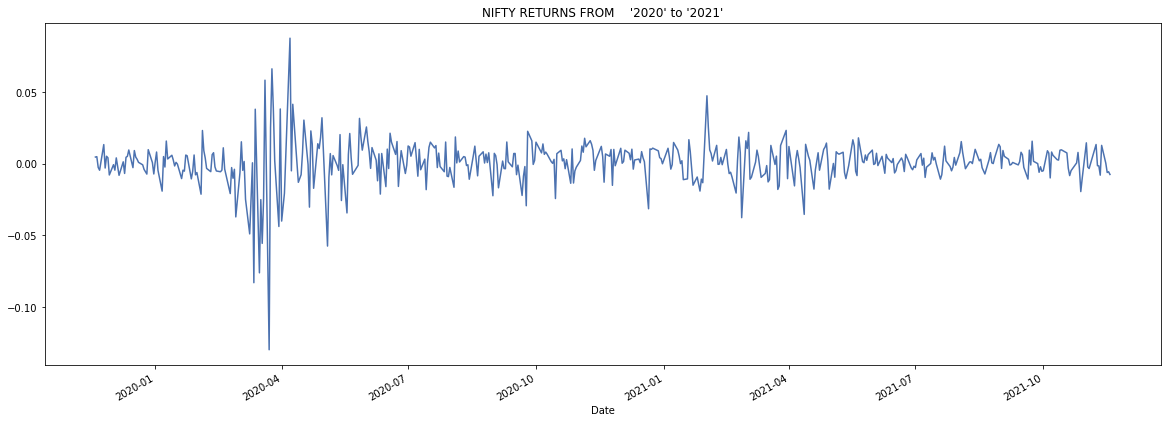

In [232]:
portfolio['^NSEI'].pct_change().plot(kind='line',figsize=(20,7),title="NIFTY RETURNS FROM    '2020' to '2021'")

In [184]:
X=portfolio.pct_change().iloc[:,:50].dropna()
y= portfolio['^NSEI'].pct_change().dropna()

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression().fit(X, y)
regr.score(X, y)
regr.coef_

array([0.00437641, 0.02184096, 0.019656  , 0.00499756, 0.0171277 ,
       0.01263891, 0.02292214, 0.00687778, 0.0071659 , 0.00530956,
       0.0067366 , 0.00399817, 0.00739741, 0.00732436, 0.00566516,
       0.01498353, 0.07008021, 0.10078228, 0.00574427, 0.0111661 ,
       0.00572964, 0.02911444, 0.05788496, 0.00948754, 0.06468266,
       0.00208209, 0.03757526, 0.01202928, 0.03902946, 0.03219623,
       0.01213646, 0.01146404, 0.01006142, 0.01020763, 0.00444616,
       0.00633027, 0.11666041, 0.0043184 , 0.02273911, 0.00588641,
       0.01561119, 0.0028937 , 0.00708245, 0.00733487, 0.04859701,
       0.01506472, 0.00949347, 0.01433251, 0.00566249, 0.01399367])

In [192]:
list1=list(X.columns)
list2= list(regr.coef_.round(2))
results_regression= pd.DataFrame(list(zip(list1,list2)))
results_regression.columns=['Stocks','coeff'] 

In [199]:
portfolio_companies= results_regression[(results_regression['coeff']>=.05)].Stocks
portfolio_companies

16         HDFC.NS
17     HDFCBANK.NS
22    ICICIBANK.NS
24         INFY.NS
36     RELIANCE.NS
44          TCS.NS
Name: Stocks, dtype: object

In [55]:
portfolio.to_csv('portfolios.csv')
from google.colab import files
files.download("portfolios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
# from google.colab import drive
# drive.mount('drive')

# df.to_csv('/content/drive/My Drive/filename.csv', encoding='utf-8', index=False)

#**PORTFOLIO OPTIMISATION**


---



In [200]:
lt= list(portfolio_companies)
lt.append('^NSEI')
lt

file= yf.download(tickers=lt,rounding=True,period='2y')['Adj Close'].dropna()
file.head()

[*********************100%***********************]  7 of 7 completed


,HDFC.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS,^NSEI
Date,,,,,,,
2019-11-18,2167.69,1256.61,496.90,675.00,1435.47,2089.28,11884.5
2019-11-19,2144.23,1266.42,492.06,682.33,1485.20,2046.77,11940.1
2019-11-20,2133.42,1267.86,493.55,682.47,1522.48,2046.53,11999.1
2019-11-21,2142.53,1277.82,496.80,682.71,1512.60,2055.80,11968.4
2019-11-22,2168.66,1259.30,495.35,663.52,1521.35,2010.76,11914.4


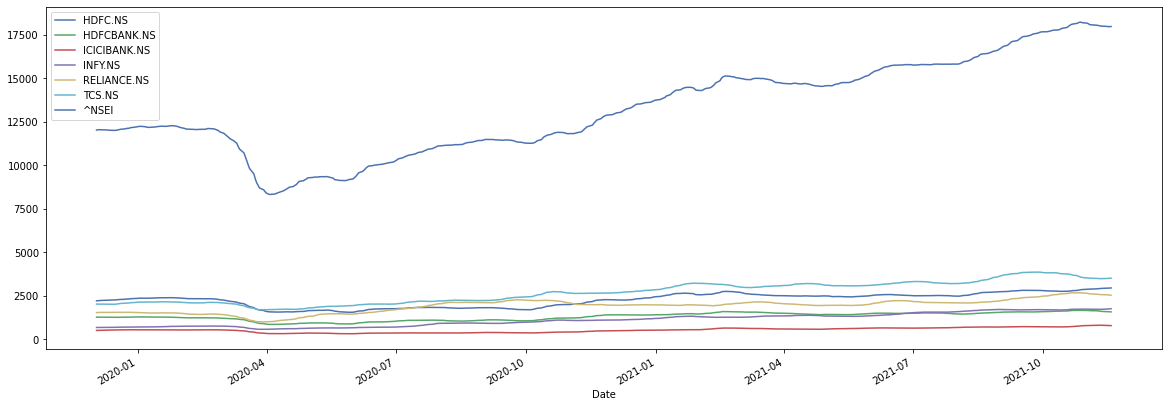

In [201]:
fig1=file.rolling(window=12).mean().plot(figsize=(20,7))

In [202]:
file.describe().round(3).loc[['min','mean','max'],:]

,HDFC.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS,^NSEI
min,1453.540,764.390,283.170,503.910,869.680,1603.450,7610.250
mean,2257.032,1299.833,522.657,1111.307,1909.096,2682.145,13257.884
max,3000.850,1688.700,841.700,1806.140,2731.850,3946.980,18477.050


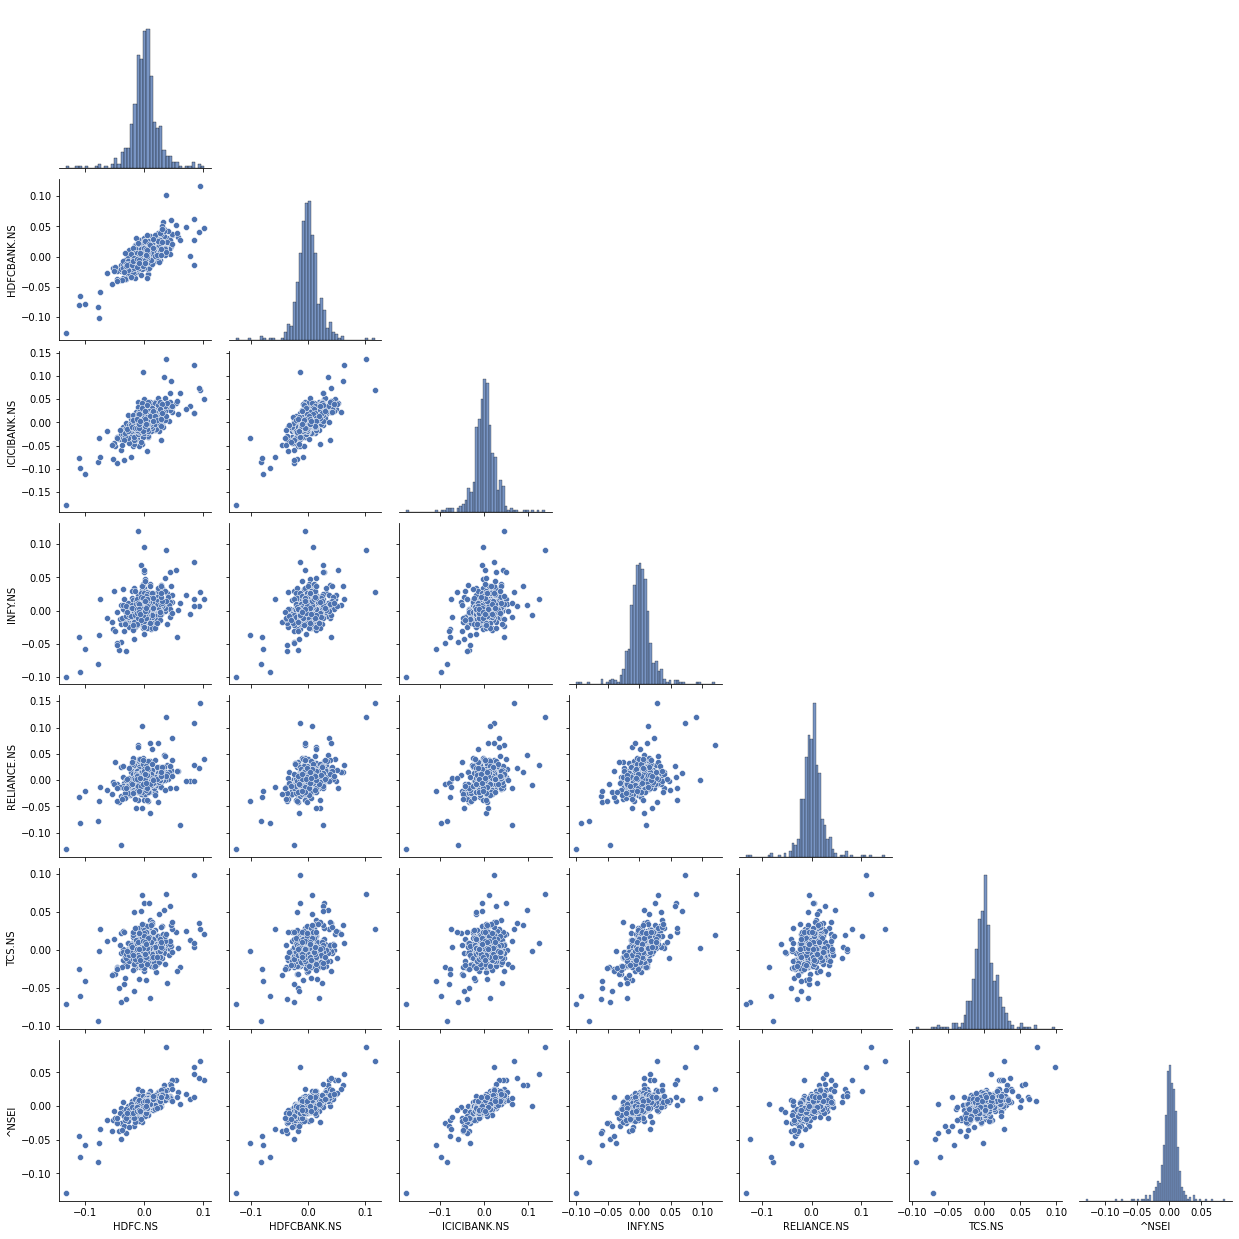

In [204]:
sns.pairplot(file.pct_change(),corner=True,diag_kind='hist')

In [205]:
import pypfopt
from pypfopt import risk_models, expected_returns, plotting

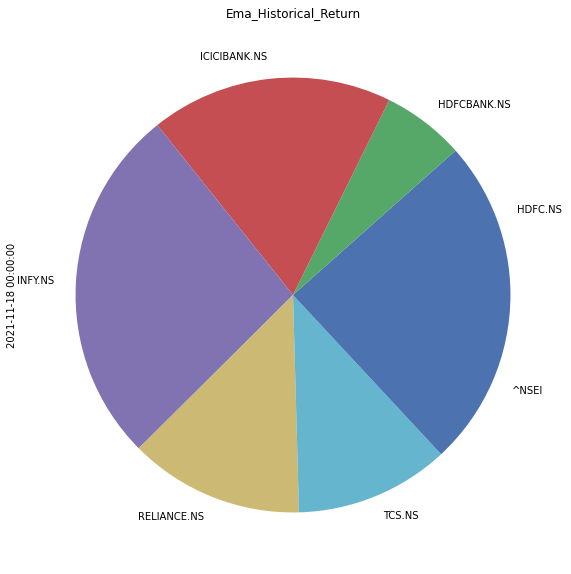

In [206]:
from pypfopt import  expected_returns
mu= pypfopt.expected_returns.ema_historical_return(file, log_returns=True)
mu.plot(kind='pie',figsize=(10,10),title ='Ema_Historical_Return')


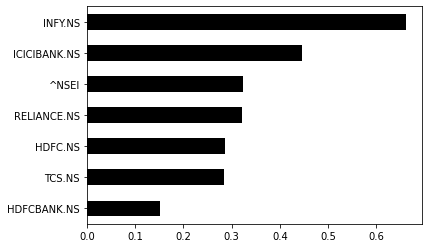

In [207]:
mean= pd.Series(mu).sort_values()
mean.plot(kind='barh',color='black')

In [64]:
# import cufflinks as cf
# import plotly
# import plotly.offline as plyo
# plyo.init_notebook_mode(connected=True)


# from IPython.display import display,HTML

# cf.set_config_file(theme='ggplot',sharing='public',offline=False)
# %reload_ext autoreload
# %autoreload 2
# cf.datagen.lines(1,1000).iplot()


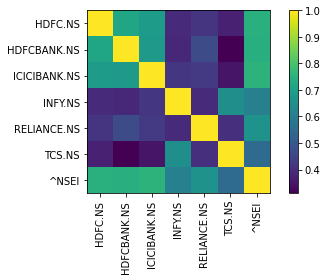

In [208]:
cov = risk_models.sample_cov(pd.DataFrame(file))
#Thus we calculate  Shrinked Covaraince
S = risk_models.CovarianceShrinkage(file).ledoit_wolf().round(3) 
plotting.plot_covariance(S, plot_correlation=True);

In [209]:
S

,HDFC.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS,^NSEI
HDFC.NS,0.151,0.094,0.116,0.049,0.060,0.043,0.073
HDFCBANK.NS,0.094,0.113,0.099,0.042,0.059,0.031,0.063
ICICIBANK.NS,0.116,0.099,0.187,0.058,0.069,0.045,0.082
INFY.NS,0.049,0.042,0.058,0.102,0.047,0.062,0.049
RELIANCE.NS,0.060,0.059,0.069,0.047,0.139,0.045,0.062
TCS.NS,0.043,0.031,0.045,0.062,0.045,0.088,0.041
^NSEI,0.073,0.063,0.082,0.049,0.062,0.041,0.063


In [210]:
#PORTFOLIO OPTIMIZATION

from pypfopt import EfficientFrontier

In [211]:
ef= EfficientFrontier(mean,S,weight_bounds=(None, None))
ef.min_volatility()
weights=ef.clean_weights
weights
ef.weights.sum()

1.0000000000000002

In [213]:
from pypfopt import CLA, plotting

cla = CLA(mean,S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 65.6%
Annual volatility: 24.9%
Sharpe Ratio: 2.55


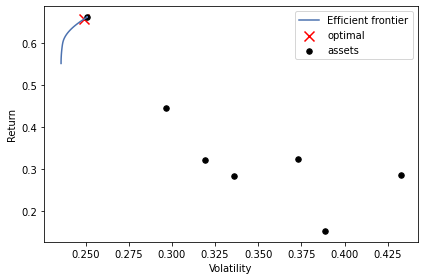

In [214]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [215]:
ef.portfolio_performance(verbose=True)

Expected annual return: 66.1%
Annual volatility: 22.8%
Sharpe Ratio: 2.81


(0.6605179533829421, 0.22812331535345579, 2.807770667327534)

#TARGETED RETURN : 15%

In [216]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
# ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=15/100, market_neutral=True)
weights_1 = ef.clean_weights()
weights_1
ef.portfolio_performance(verbose=True)

Expected annual return: 15.0%
Annual volatility: 7.9%
Sharpe Ratio: 1.65


(0.1499999999999999, 0.07870093407643045, 1.6518228344501016)

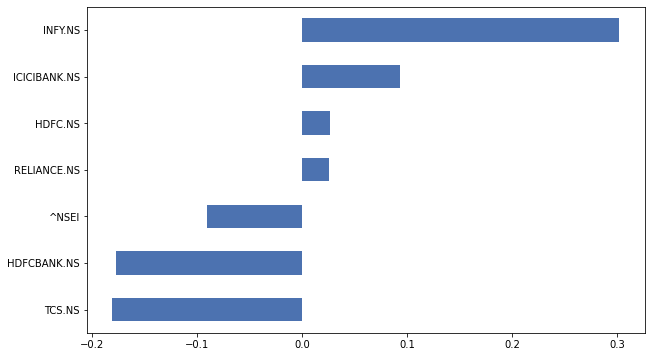

In [217]:
pd.Series(weights_1).sort_values().plot.barh(figsize=(10,6));

In [218]:
list(weights_1.values())*1

[0.02672, -0.17702, 0.09356, 0.30248, 0.02605, -0.18105, -0.09074]

0         HDFC.NS
1     HDFCBANK.NS
2    ICICIBANK.NS
3         INFY.NS
4     RELIANCE.NS
5          TCS.NS
6           ^NSEI
Name: 0, dtype: object

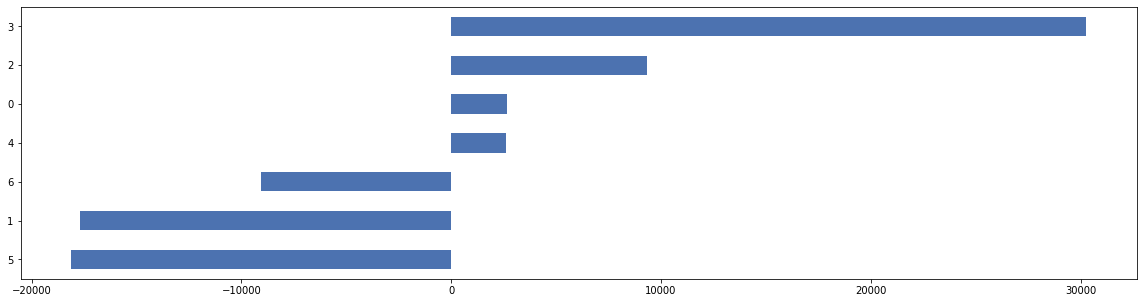

In [219]:
portfolio_weights=pd.DataFrame(weights_1.items())
(portfolio_weights[1]*100000).sort_values().plot.barh(figsize=(20,5))
y=portfolio_weights[0]
y

In [220]:
portfolio_weights['Amount to invest']=portfolio_weights[1]*100000
portfolio_weights

portfolio_weights[portfolio_weights['Amount to invest'] > 0]

,0,1,Amount to invest
0,HDFC.NS,0.02672,2672.0
2,ICICIBANK.NS,0.09356,9356.0
3,INFY.NS,0.30248,30248.0
4,RELIANCE.NS,0.02605,2605.0


In [243]:
portfolio_weights[0]
too[0]

HDFC.NS
ICICIBANK.NS
INFY.NS
RELIANCE.NS

0         HDFC.NS
2    ICICIBANK.NS
3         INFY.NS
4     RELIANCE.NS
Name: 0, dtype: object

[*********************100%***********************]  4 of 4 completed


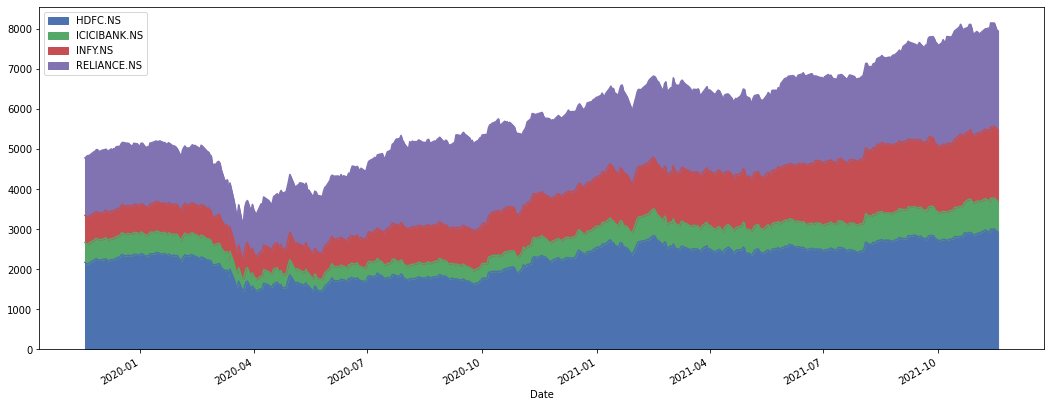

In [259]:
# too=portfolio_weights[portfolio_weights['Amount to invest'] > 0]
tick=['HDFC.NS','ICICIBANK.NS','INFY.NS','RELIANCE.NS']

weighted= yf.download(tickers=tick,rounding=True,period='2y')['Adj Close'].dropna()
pd.DataFrame(weighted.dropna()).plot(figsize=(18,7),kind='area')
plt.legend(loc='upper left')

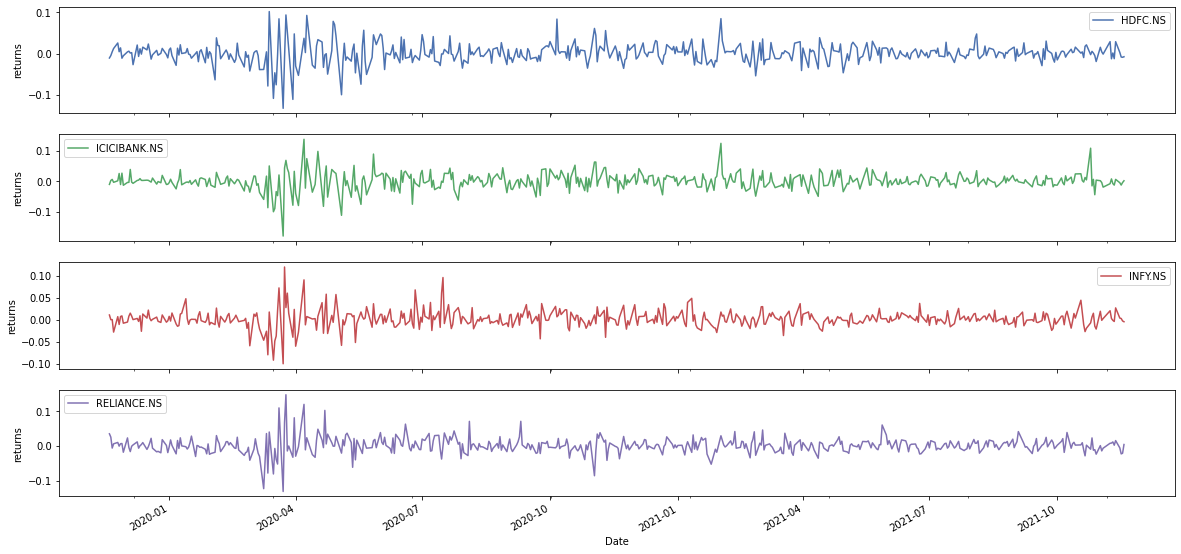

In [265]:
pd.DataFrame(weighted.pct_change().dropna()).plot(figsize=(20,10),kind='line',subplots=True,ylabel='returns')
plt.legend(loc='upper left')